In [1]:
import pandas as pd
import numpy as np
import pymongo
from pymongo import MongoClient
connection = MongoClient()

db = connection.movie_dataset
metadata = db.metadata
metadata

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'movie_dataset'), 'metadata')

# Dataset

In [2]:
df_metadata = pd.DataFrame(metadata.find({}))
df_metadata

,_id,adult,belongs_to_collection,budget,genres,original_language,original_title,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,862,False,10194.0,30000000,"[16, 35, 10751]",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,1995-10-30,373554033.0,81.0,[en],Released,NaN,Toy Story,False,7.7,5415.0
1,8844,False,NaN,65000000,"[12, 14, 10751]",en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,1995-12-15,262797249.0,104.0,"[en, fr]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,15602,False,119050.0,0,"[10749, 35]",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,1995-12-22,0.0,101.0,[en],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,31357,False,NaN,16000000,"[35, 18, 10749]",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,1995-12-22,81452156.0,127.0,[en],Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,11862,False,96871.0,0,[35],en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,1995-02-10,76578911.0,106.0,[en],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45428,439050,False,NaN,0,"[18, 10751]",fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,...,NaN,0.0,90.0,[fa],Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45429,111109,False,NaN,0,[18],tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,2011-11-17,0.0,360.0,[tl],Released,NaN,Century of Birthing,False,9.0,3.0
45430,67758,False,NaN,0,"[28, 18, 53]",en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,...,2003-08-01,0.0,90.0,[en],Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45431,227506,False,NaN,0,[],en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [3]:
counts = []
for col in df_metadata.columns:
    na_count = df_metadata[df_metadata[col].isna()].shape[0]
    counts.append(na_count)

pd.DataFrame(counts, index=df_metadata.columns, columns=['NA'])

,NA
_id,0
adult,0
belongs_to_collection,40945
budget,0
genres,0
original_language,11
original_title,0
overview,954
popularity,3
poster_path,386


# Preprocessing: trasformazione del tipo di dati

In [4]:
df_metadata.dtypes

_id                        int64
adult                     object
belongs_to_collection    float64
budget                    object
genres                    object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [5]:
df_metadata['budget'] = df_metadata.copy().budget.astype('float64')
df_metadata['popularity'] = df_metadata.copy().popularity.astype('float64')
df_metadata.dtypes

_id                        int64
adult                     object
belongs_to_collection    float64
budget                   float64
genres                    object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

# Grafici preliminari
## Considerando anche gli outlier

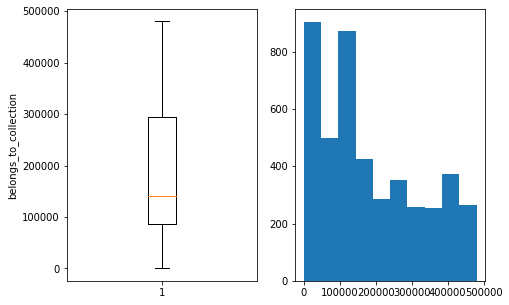

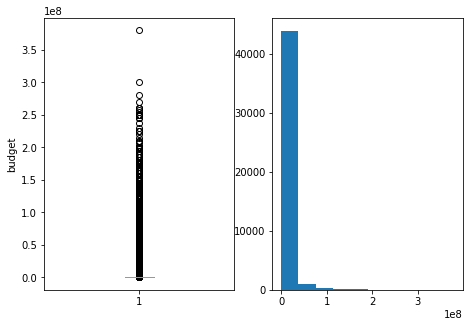

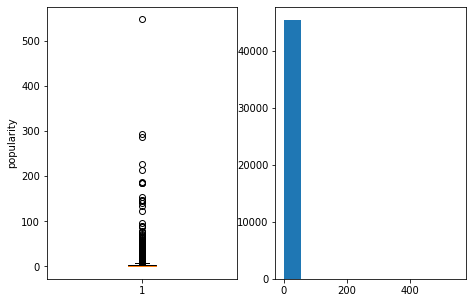

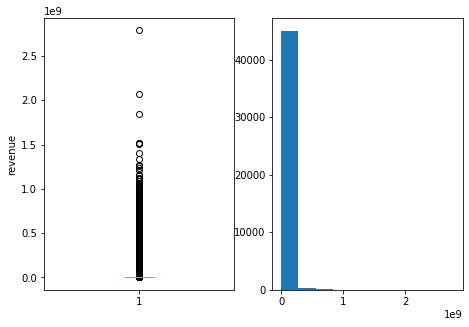

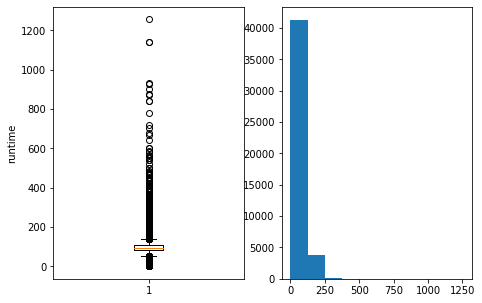

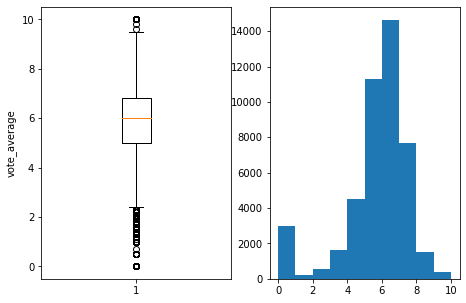

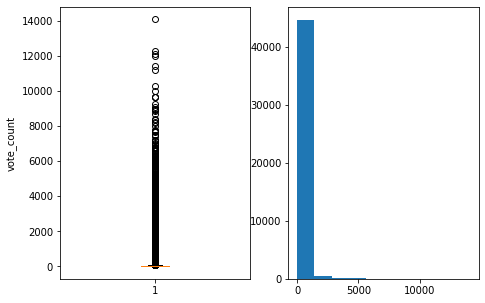

In [6]:
from matplotlib import pyplot as plt
x_axis = range(df_metadata.shape[0])

for col in df_metadata.columns:
    if df_metadata[col].dtypes == 'float64':
        not_na = df_metadata[df_metadata[col].notna()][col]
        plt.figure(figsize=(7.5, 5))
        plt.subplot(1, 2, 1)
        plt.ylabel(col)
        plt.boxplot(not_na)
        plt.subplot(1, 2, 2)
        plt.hist(not_na, bins=10)
        plt.show()

## Senza outlier

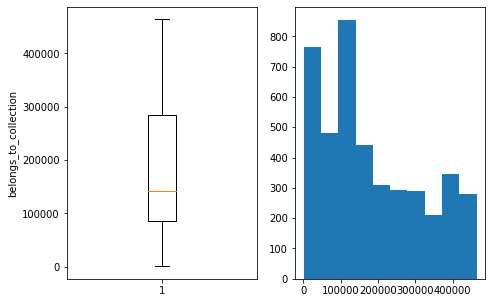

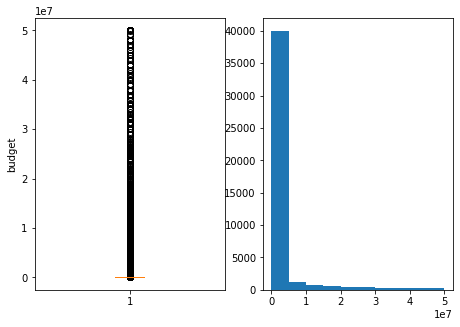

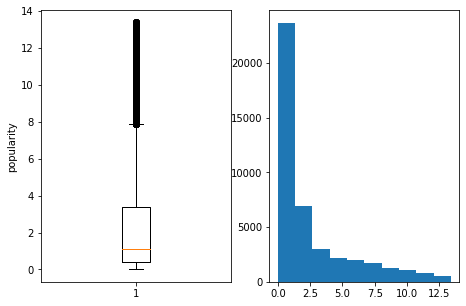

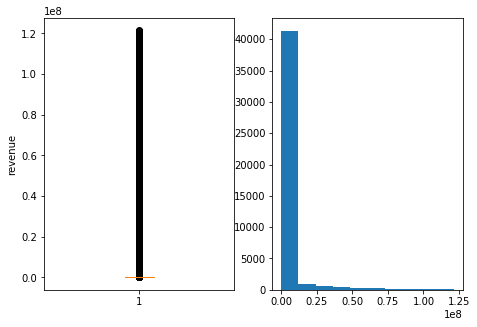

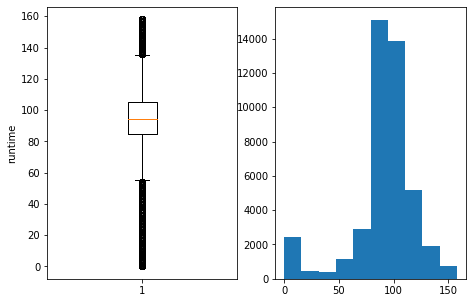

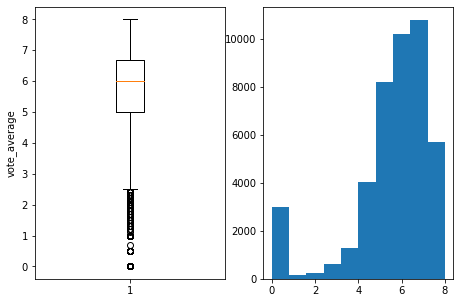

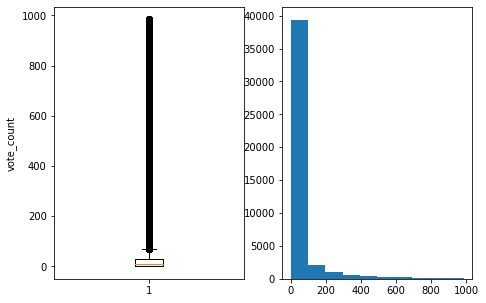

In [7]:
outl1 = 2.5
outl2 = 100 - outl1

for col in df_metadata.columns:
    if df_metadata[col].dtypes == 'float64':
        not_na = df_metadata[df_metadata[col].notna()].copy()[col]
        not_naInf = np.percentile(not_na, outl1)
        not_naSup = np.percentile(not_na, outl2)
        not_na = not_na[(not_na.values >= not_naInf) & (not_na.values <= not_naSup)]
        plt.figure(figsize=(7.5, 5))
        plt.subplot(1, 2, 1)
        plt.ylabel(col)
        plt.boxplot(not_na)
        plt.subplot(1, 2, 2)
        plt.hist(not_na, bins=10)
        plt.show()

Dai grafici si conclude che:
* ci sono molti dati mancanti (uguali a 0) in *budget* e *revenue*;
* sono presenti degli outlier in *budget*, *popularity*, *revenue*, *runtime* e *vote_count*.
## Eliminando gli outlier su tutti i dati prima di realizzare i grafici

In [8]:
num_data = df_metadata[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']].copy()
num_data = num_data[num_data.budget.notna() & num_data.popularity.notna() & num_data.revenue.notna() & num_data.runtime.notna() & num_data.vote_average.notna() & num_data.vote_count.notna()]

mask1 = (num_data.budget >= np.percentile(num_data.budget, outl1)) & (num_data.budget <= np.percentile(num_data.budget, outl2))
mask2 = (num_data.popularity >= np.percentile(num_data.popularity, outl1)) & (num_data.popularity <= np.percentile(num_data.popularity, outl2))
mask3 = (num_data.revenue >= np.percentile(num_data.revenue, outl1)) & (num_data.revenue <= np.percentile(num_data.revenue, outl2))
mask4 = (num_data.runtime >= np.percentile(num_data.runtime, outl1)) & (num_data.runtime <= np.percentile(num_data.runtime, outl2))
mask5 = (num_data.vote_count >= np.percentile(num_data.vote_count, outl1)) & (num_data.vote_count <= np.percentile(num_data.vote_count, outl2))

num_data = num_data[mask1 & mask2 & mask3 & mask4 & mask5]
num_data

,budget,popularity,revenue,runtime,vote_average,vote_count
2,0.0,11.712900,0.0,101.0,6.5,92.0
3,16000000.0,3.859495,81452156.0,127.0,6.1,34.0
4,0.0,8.387519,76578911.0,106.0,5.7,173.0
7,0.0,2.561161,0.0,97.0,5.4,45.0
8,35000000.0,5.231580,64350171.0,106.0,5.5,174.0
...,...,...,...,...,...,...
45427,0.0,5.683753,0.0,104.0,5.7,26.0
45428,0.0,0.072051,0.0,90.0,4.0,1.0
45430,0.0,0.903007,0.0,90.0,3.8,6.0
45431,0.0,0.003503,0.0,87.0,0.0,0.0


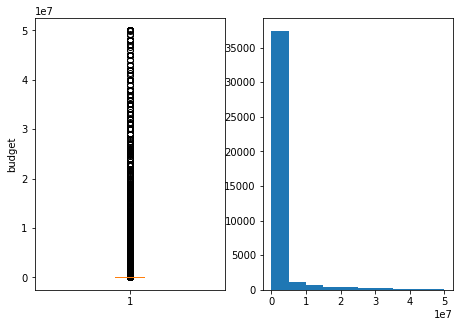

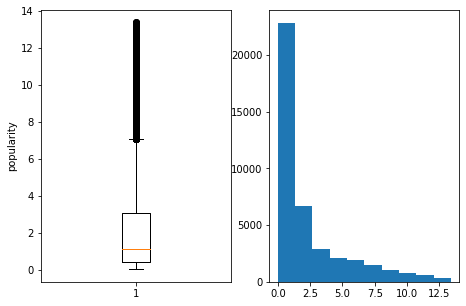

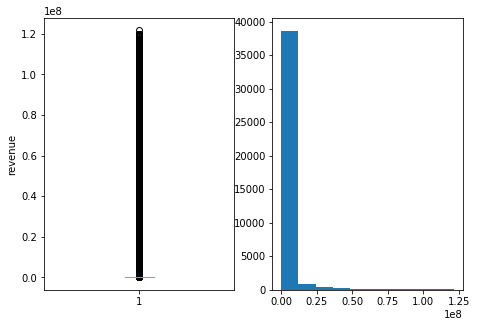

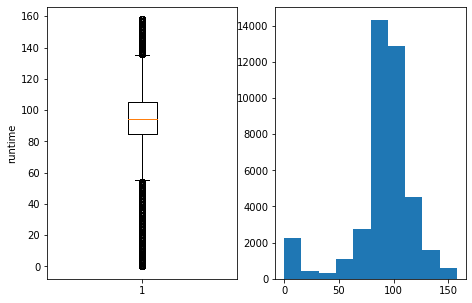

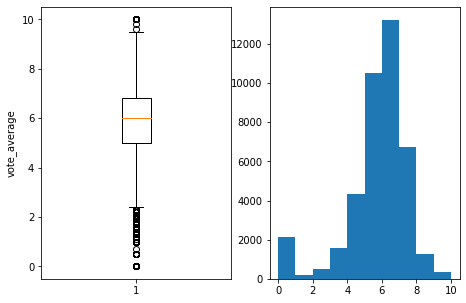

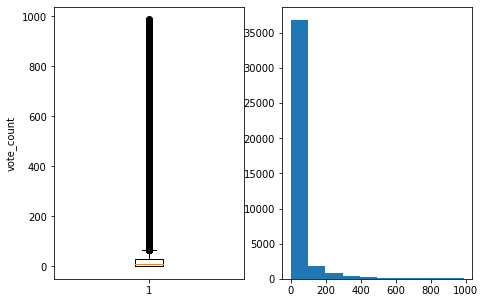

In [9]:
x_axis = range(num_data.shape[0])

for col in num_data.columns:
    plt.figure(figsize=(7.5, 5))
    plt.subplot(1, 2, 1)
    plt.ylabel(col)
    plt.boxplot(num_data[col])
    plt.subplot(1, 2, 2)
    plt.hist(num_data[col], bins=10)
    plt.show()

Si potrebbe migliorare aggiustando i dati mancanti (uguali a 0) in *budget* e *revenue*.
## Sostituendo i valori mancanti con la media

In [10]:
num_data_fixed = num_data.copy()

budget_fixed = num_data_fixed.budget
budget_fixed[budget_fixed == 0.0] = budget_fixed.mean()
revenue_fixed = num_data_fixed.revenue
revenue_fixed[revenue_fixed == 0.0] = revenue_fixed.mean()

num_data_fixed

,budget,popularity,revenue,runtime,vote_average,vote_count
2,1.557055e+06,11.712900,2.351746e+06,101.0,6.5,92.0
3,1.600000e+07,3.859495,8.145216e+07,127.0,6.1,34.0
4,1.557055e+06,8.387519,7.657891e+07,106.0,5.7,173.0
7,1.557055e+06,2.561161,2.351746e+06,97.0,5.4,45.0
8,3.500000e+07,5.231580,6.435017e+07,106.0,5.5,174.0
...,...,...,...,...,...,...
45427,1.557055e+06,5.683753,2.351746e+06,104.0,5.7,26.0
45428,1.557055e+06,0.072051,2.351746e+06,90.0,4.0,1.0
45430,1.557055e+06,0.903007,2.351746e+06,90.0,3.8,6.0
45431,1.557055e+06,0.003503,2.351746e+06,87.0,0.0,0.0


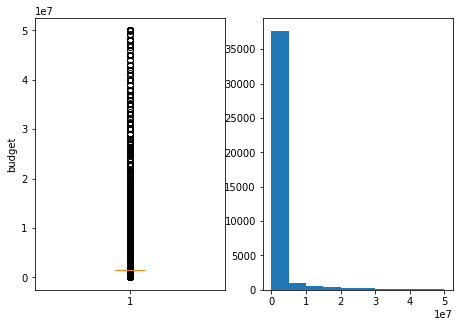

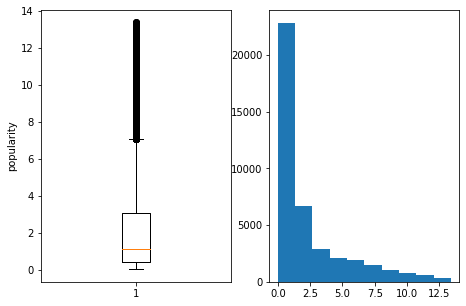

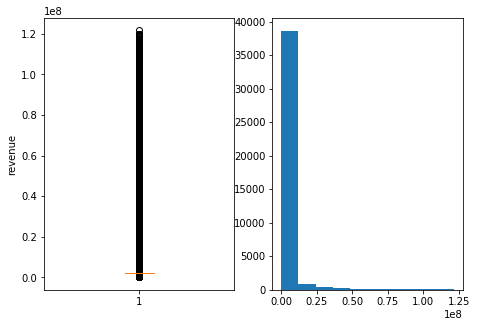

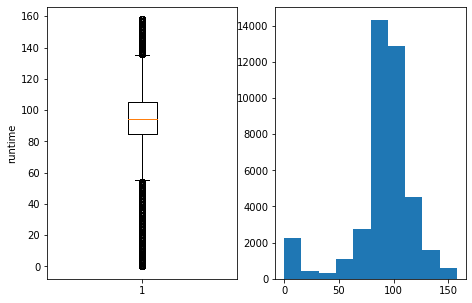

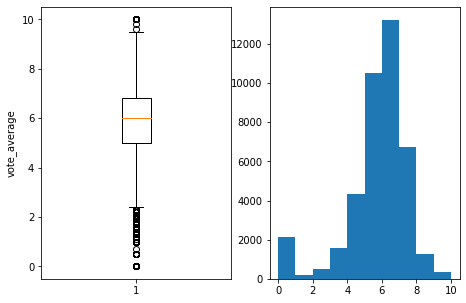

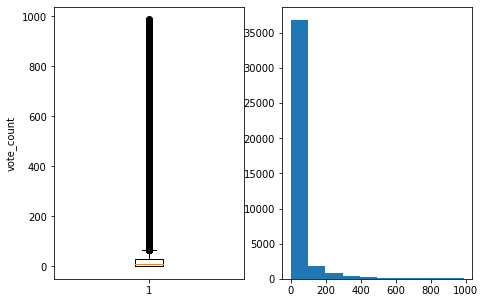

In [11]:
x_axis = range(num_data_fixed.shape[0])

for col in num_data_fixed.columns:
    plt.figure(figsize=(7.5, 5))
    plt.subplot(1, 2, 1)
    plt.ylabel(col)
    plt.boxplot(num_data_fixed[col])
    plt.subplot(1, 2, 2)
    plt.hist(num_data_fixed[col], bins=10)
    plt.show()

# Correlazione
## Prima del preprocessing

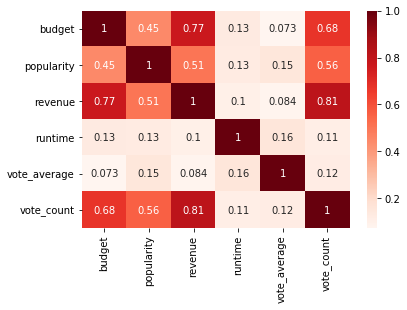

In [12]:
import seaborn as sns
data_corr = df_metadata.iloc[:, 3:].corr()
sns.heatmap(data_corr, annot=True, cmap='Reds')

## Dopo il preprocessing

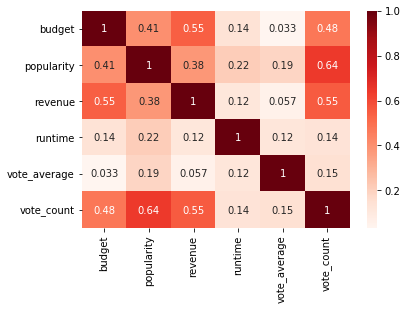

In [13]:
data_corr = num_data_fixed.corr()
sns.heatmap(data_corr, annot=True, cmap='Reds')

# Scatter plot a coppie
## Sui dati trasformati

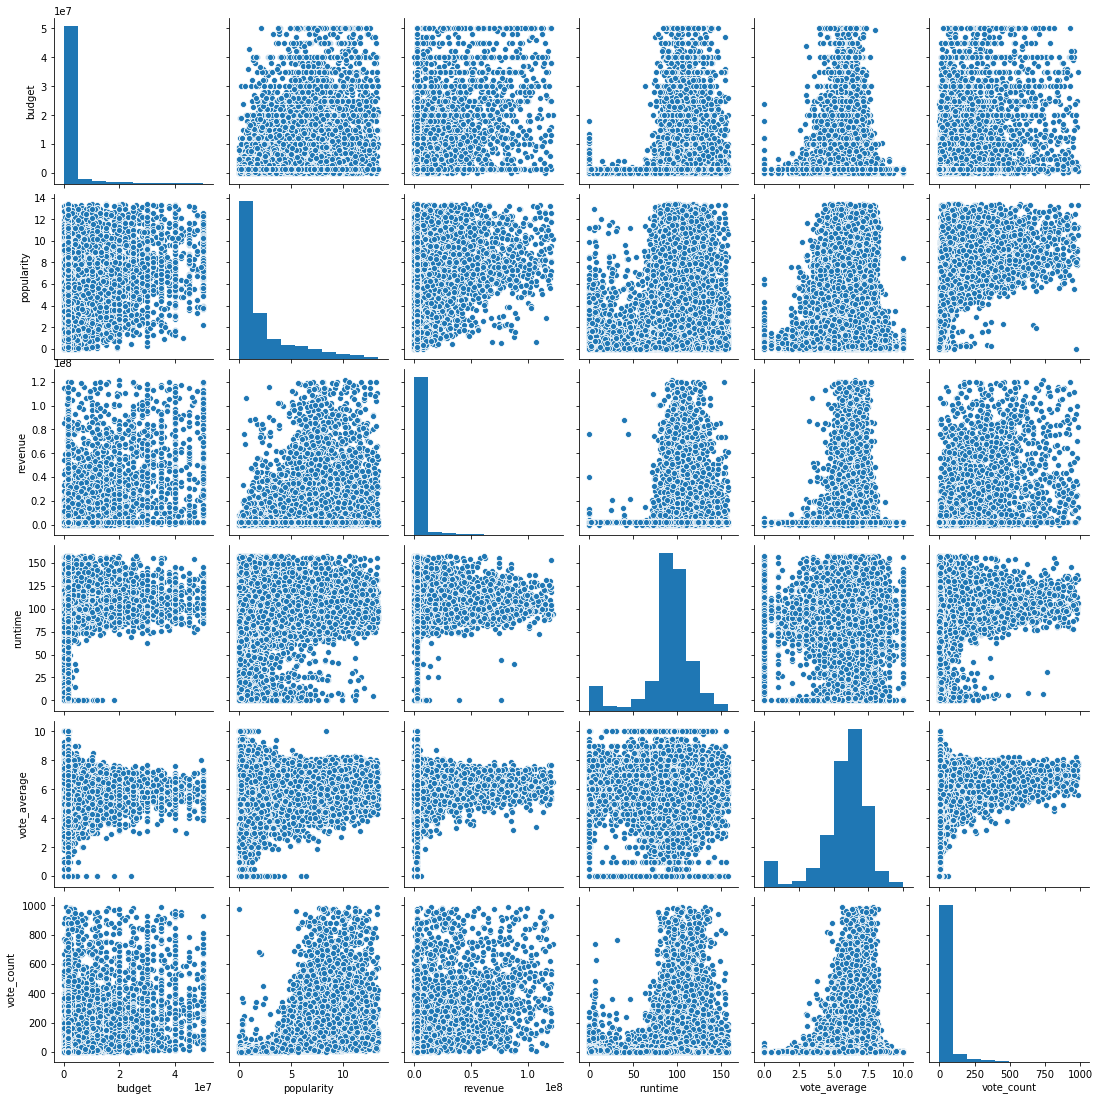

In [14]:
sns.pairplot(num_data_fixed)

## Sui dati standardizzati

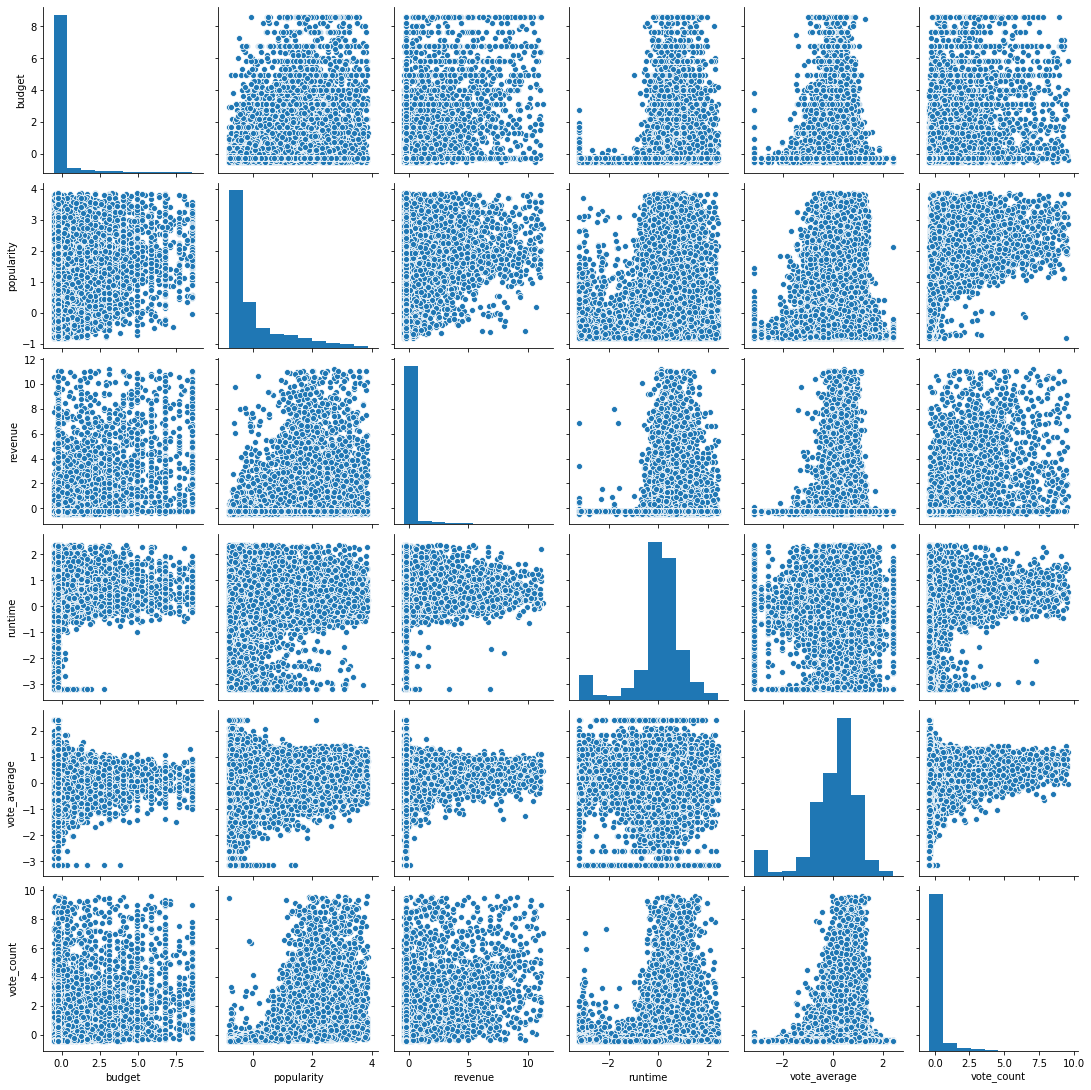

In [15]:
from sklearn.preprocessing import StandardScaler

standardised_data = num_data_fixed.copy()
scaler = StandardScaler().fit(standardised_data)
standardised_data = pd.DataFrame(scaler.transform(standardised_data), columns=num_data_fixed.columns)

sns.pairplot(standardised_data)